# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**


---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Leishmania_03_bioactivity_data_curated.csv')
df

In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL164580,100000.0,inactive,C[N+]1(CCOP(=O)([O-])OCCOC2CCCCC2)CCOCC1
1,CHEMBL166314,4020.0,intermediate,C[N+](C)(C)CCOP(=O)([O-])OCCCCCC12CC3CC(CC(C3)...
2,CHEMBL165097,100000.0,inactive,C[N+](C)(C)CCOP(=O)([O-])OCCCCC=C1CCCCC1
3,CHEMBL166092,3160.0,intermediate,C[N+](C)(C)CCOP(=O)([O-])OCCCCCCCCCCC=C1C2CC3C...
4,CHEMBL349670,100000.0,inactive,C[N+](C)(C)CCOP(=O)([O-])OCCOc1ccc2ccccc2c1
...,...,...,...,...
6486,CHEMBL4873840,58.6,active,N=C(N)Nc1ccc2[nH]c(-c3csc4ccccc34)nc2c1
6487,CHEMBL4876357,37.7,active,N=C(N)Nc1ccc2[nH]c(-c3ccc(-c4cccs4)s3)nc2c1
6488,CHEMBL4862955,44.0,active,N=C(N)Nc1ccc2[nH]c(-c3ccc(-c4ccccc4)s3)nc2c1
6489,CHEMBL4849996,7.7,active,N=C(N)Nc1ccc2[nH]c(-c3cc(-c4ccc(Cl)cc4)on3)nc2c1


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,351.380,1.31410,0.0,6.0
1,387.501,3.97100,0.0,4.0
2,333.409,3.25500,0.0,4.0
3,469.647,6.08760,0.0,4.0
4,353.355,2.42640,0.0,5.0
...,...,...,...,...
6486,307.382,3.74997,4.0,3.0
6487,339.449,4.32527,4.0,4.0
6488,333.420,4.26377,4.0,3.0
6489,352.785,3.84367,4.0,4.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL164580,C[N+]1(CCOP(=O)([O-])OCCOC2CCCCC2)CCOCC1,100000.0,inactive
1,CHEMBL166314,C[N+](C)(C)CCOP(=O)([O-])OCCCCCC12CC3CC(CC(C3)...,4020.0,intermediate
2,CHEMBL165097,C[N+](C)(C)CCOP(=O)([O-])OCCCCC=C1CCCCC1,100000.0,inactive
3,CHEMBL166092,C[N+](C)(C)CCOP(=O)([O-])OCCCCCCCCCCC=C1C2CC3C...,3160.0,intermediate
4,CHEMBL349670,C[N+](C)(C)CCOP(=O)([O-])OCCOc1ccc2ccccc2c1,100000.0,inactive
...,...,...,...,...
6486,CHEMBL4873840,N=C(N)Nc1ccc2[nH]c(-c3csc4ccccc34)nc2c1,58.6,active
6487,CHEMBL4876357,N=C(N)Nc1ccc2[nH]c(-c3ccc(-c4cccs4)s3)nc2c1,37.7,active
6488,CHEMBL4862955,N=C(N)Nc1ccc2[nH]c(-c3ccc(-c4ccccc4)s3)nc2c1,44.0,active
6489,CHEMBL4849996,N=C(N)Nc1ccc2[nH]c(-c3cc(-c4ccc(Cl)cc4)on3)nc2c1,7.7,active


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL164580,C[N+]1(CCOP(=O)([O-])OCCOC2CCCCC2)CCOCC1,100000.0,inactive,351.380,1.31410,0.0,6.0
1,CHEMBL166314,C[N+](C)(C)CCOP(=O)([O-])OCCCCCC12CC3CC(CC(C3)...,4020.0,intermediate,387.501,3.97100,0.0,4.0
2,CHEMBL165097,C[N+](C)(C)CCOP(=O)([O-])OCCCCC=C1CCCCC1,100000.0,inactive,333.409,3.25500,0.0,4.0
3,CHEMBL166092,C[N+](C)(C)CCOP(=O)([O-])OCCCCCCCCCCC=C1C2CC3C...,3160.0,intermediate,469.647,6.08760,0.0,4.0
4,CHEMBL349670,C[N+](C)(C)CCOP(=O)([O-])OCCOc1ccc2ccccc2c1,100000.0,inactive,353.355,2.42640,0.0,5.0
...,...,...,...,...,...,...,...,...
6486,CHEMBL4873840,N=C(N)Nc1ccc2[nH]c(-c3csc4ccccc34)nc2c1,58.6,active,307.382,3.74997,4.0,3.0
6487,CHEMBL4876357,N=C(N)Nc1ccc2[nH]c(-c3ccc(-c4cccs4)s3)nc2c1,37.7,active,339.449,4.32527,4.0,4.0
6488,CHEMBL4862955,N=C(N)Nc1ccc2[nH]c(-c3ccc(-c4ccccc4)s3)nc2c1,44.0,active,333.420,4.26377,4.0,3.0
6489,CHEMBL4849996,N=C(N)Nc1ccc2[nH]c(-c3cc(-c4ccc(Cl)cc4)on3)nc2c1,7.7,active,352.785,3.84367,4.0,4.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count    6.491000e+03
mean     5.598415e+04
std      1.249598e+06
min      2.700000e-02
25%      1.660000e+03
50%      1.118552e+04
75%      5.011872e+04
max      1.000000e+08
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

In [ ]:
df_norm.standard_value_norm.describe()

count    6.491000e+03
mean     5.598415e+04
std      1.249598e+06
min      2.700000e-02
25%      1.660000e+03
50%      1.118552e+04
75%      5.011872e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

In [ ]:
df_final.pIC50.describe()

count    6491.000000
mean        5.291644
std         1.339341
min         1.000000
25%         4.300000
50%         4.951344
75%         5.779892
max        10.568636
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [ ]:
df_final.to_csv('Leishmania_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
df_2class = pd.read_csv('Leishmania_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final#[df_final['class'] != 'intermediate']
df_2class

Let's write this to CSV file.

In [ ]:
df_2class.to_csv('Leishmania_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

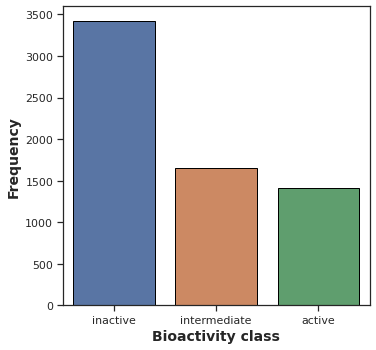

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

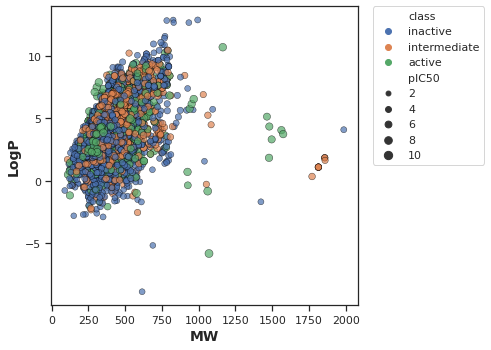

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

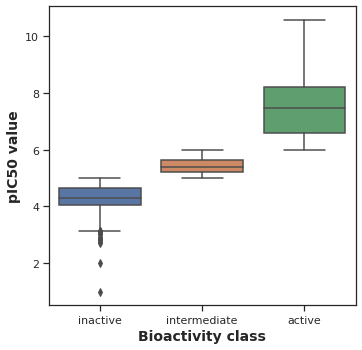

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4818362.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

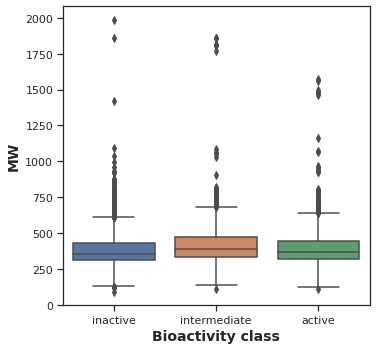

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2579697.5,0.000109,0.05,Different distribution (reject H0)


#### **LogP**

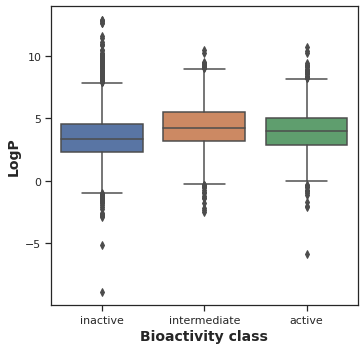

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2854105.5,5.587369e-24,0.05,Different distribution (reject H0)


#### **NumHDonors**

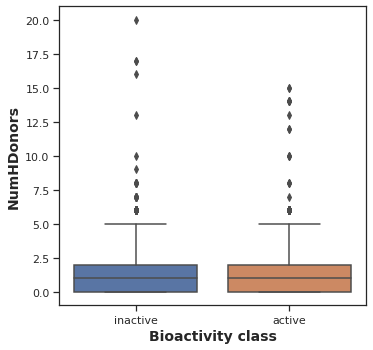

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2415957.0,0.873574,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

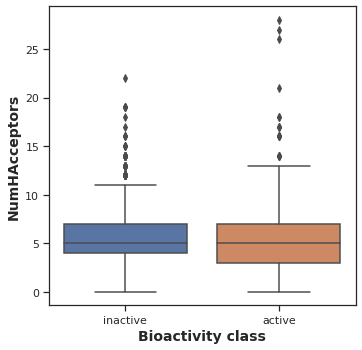

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2380378.0,0.509308,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_LogP.pdf (deflated 35%)
  adding: plot_MW.pdf (deflated 34%)
  adding: Leishmania_03_bioactivity_data_curated.csv (deflated 82%)
  adding: Leishmania_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 1%)
